In [1]:
import numpy as np
from pdf2image import convert_from_path
import cv2
import matplotlib.pyplot as plt

In [2]:
def find_amc_circles(file, dpi):
    img_file = 'img_temp.png'
    pages = convert_from_path(file, dpi)
    conts = []
    circle_min_width = int(dpi * 0.13)
    print(circle_min_width)
    for i, page in enumerate(pages):
        page.save(img_file)
        img = cv2.imread(img_file)
        # preprocess image
        gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
        morph = cv2.morphologyEx(~gray_scale, cv2.MORPH_DILATE, kernel)
        _, thresh = cv2.threshold(~morph, 0, 225, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        img_bin = ~thresh
        # filter the image to keep only circles
        kernel_circle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (circle_min_width, circle_min_width))
        img_bin_circle = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel_circle)
        # find the amc circles
        contours, hierarchy = cv2.findContours(~img_bin_circle, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        for c in contours:
            x, y, w, h = cv2.boundingRect(c)
            if (x < 320 or x > 2000) and (y < 280 or y > 3000) and w < dpi*0.2 and h < dpi*0.2:
                conts.append((x, y, w, h, x+w/2, y+h/2))
                cv2.rectangle(img,(x, y),(x + w, y + h),(0,255,0),2)

        plt.figure(figsize=(20,20))
        plt.imshow(img)
        plt.show()

    return conts

In [3]:
ex_file1 = 'scanned/question_11111.pdf'

39


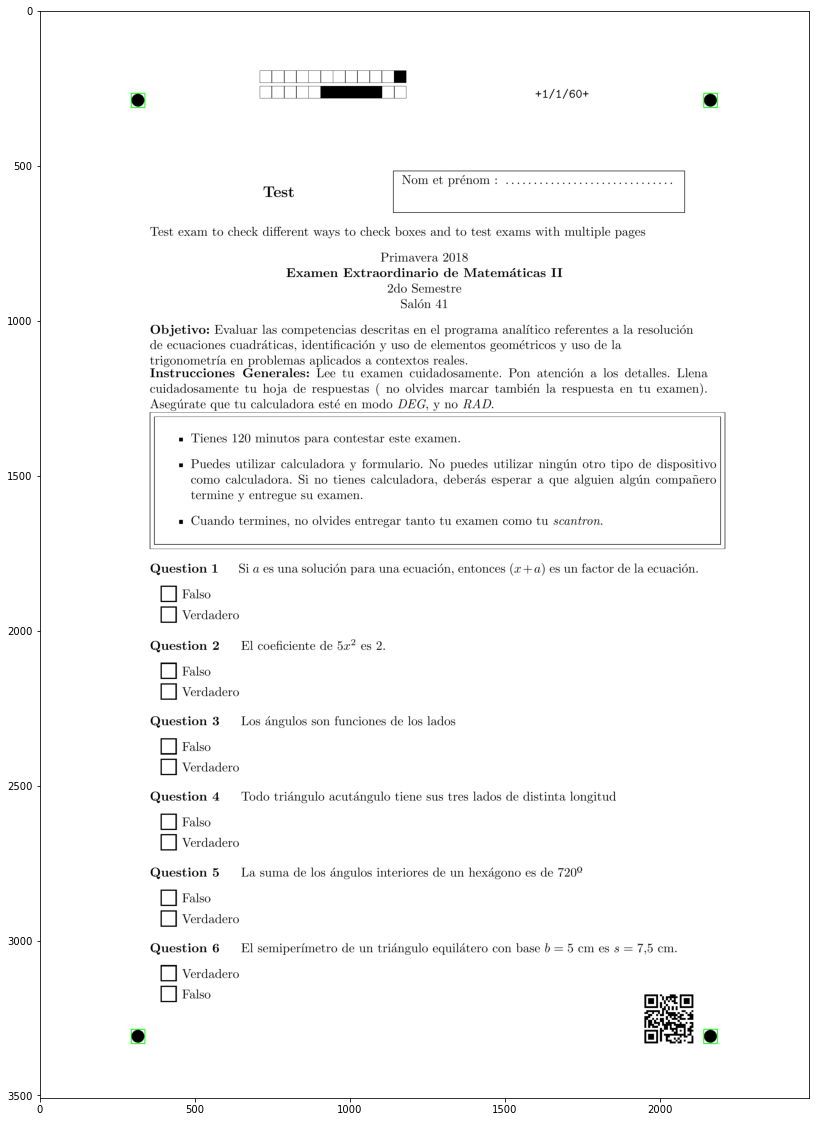

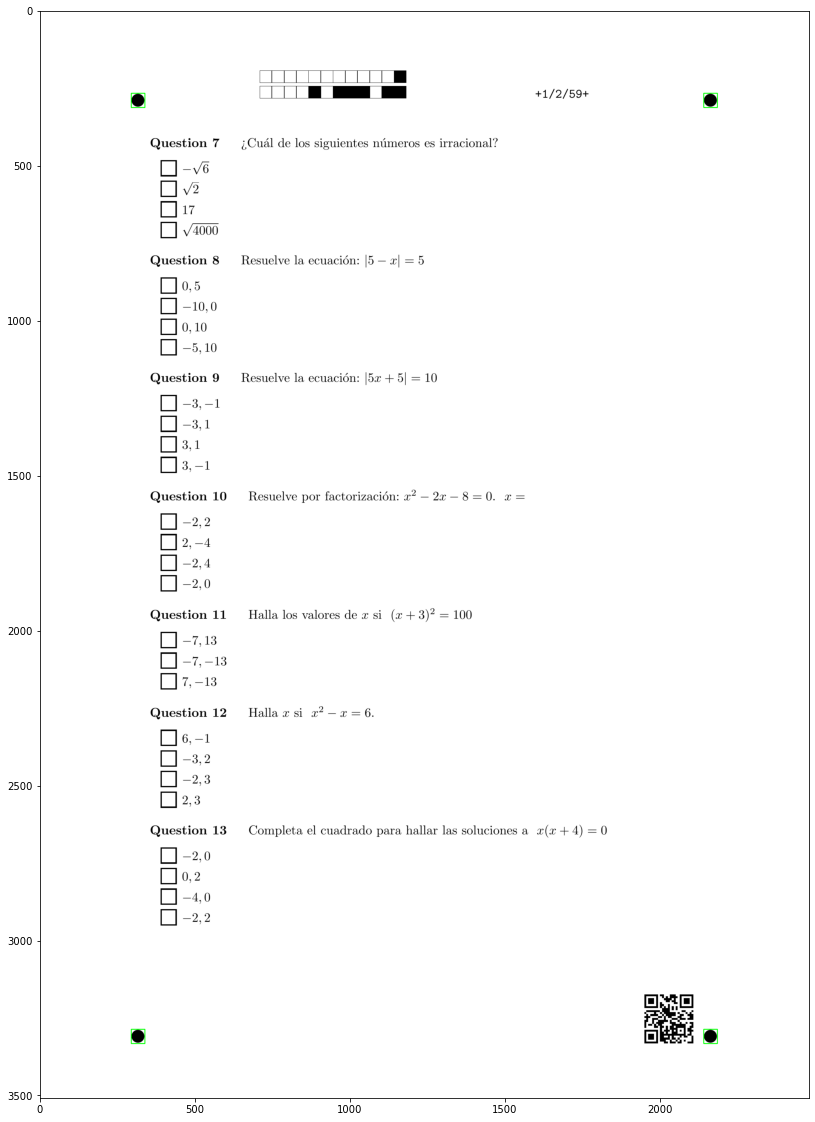

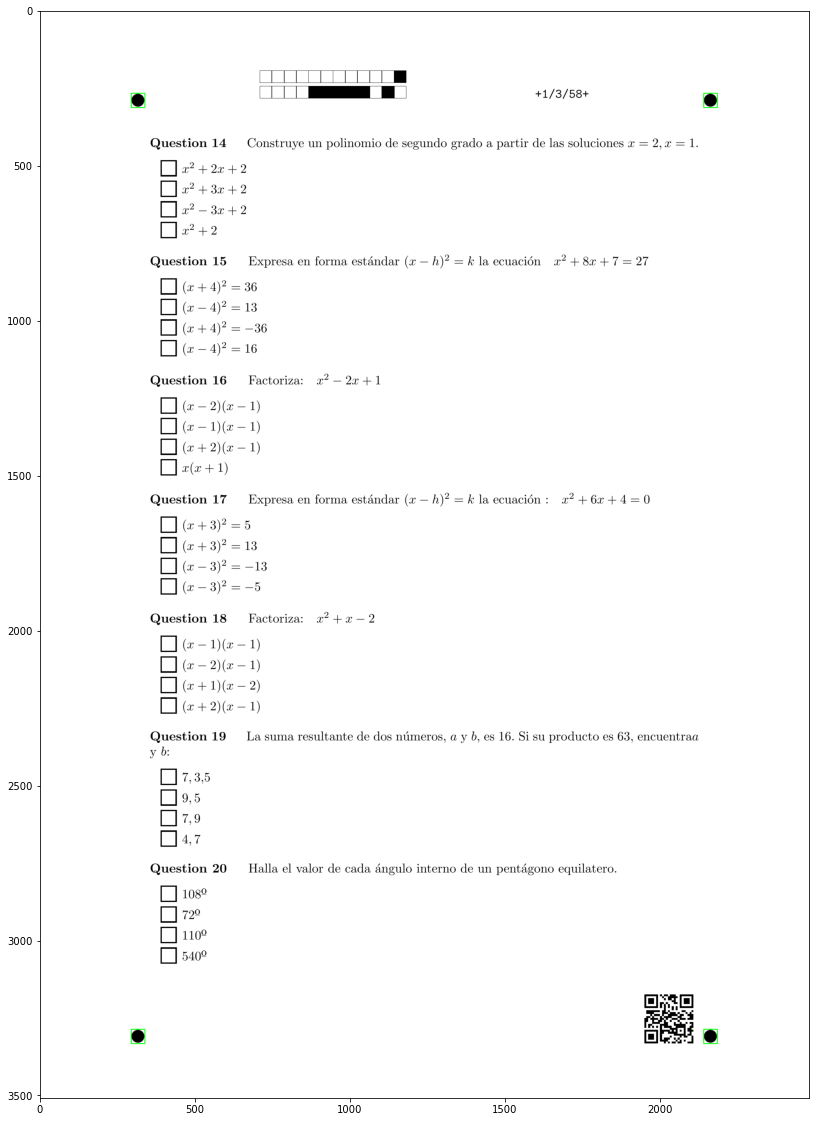

In [4]:
default_amc_circles = find_amc_circles(ex_file1, 300)

In [5]:
default_amc_circles

[(2141, 3286, 44, 46, 2163.0, 3309.0),
 (294, 3286, 44, 46, 316.0, 3309.0),
 (2141, 268, 44, 46, 2163.0, 291.0),
 (294, 268, 44, 46, 316.0, 291.0),
 (2141, 3286, 44, 46, 2163.0, 3309.0),
 (294, 3286, 44, 46, 316.0, 3309.0),
 (2141, 268, 44, 46, 2163.0, 291.0),
 (294, 268, 44, 46, 316.0, 291.0),
 (2141, 3286, 44, 46, 2163.0, 3309.0),
 (294, 3286, 44, 46, 316.0, 3309.0),
 (2141, 268, 44, 46, 2163.0, 291.0),
 (294, 268, 44, 46, 316.0, 291.0)]

In [6]:
np.array(default_amc_circles[0:2])/300 + np.array(default_amc_circles[0:2])/300#%%
import numpy as np
from pdf2image import convert_from_path
import cv2
import matplotlib.pyplot as plt

In [7]:
def find_amc_circles(file, dpi):
    img_file = 'img_temp.png'
    pages = convert_from_path(file, dpi)
    conts = []
    circle_min_width = int(dpi * 0.13)
    print(circle_min_width)
    for i, page in enumerate(pages):
        page.save(img_file)
        img = cv2.imread(img_file)
        # preprocess image
        gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
        morph = cv2.morphologyEx(~gray_scale, cv2.MORPH_DILATE, kernel)
        _, thresh = cv2.threshold(~morph, 0, 225, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        img_bin = ~thresh
        # filter the image to keep only circles
        kernel_circle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (circle_min_width, circle_min_width))
        img_bin_circle = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel_circle)
        # find the amc circles
        contours, hierarchy = cv2.findContours(~img_bin_circle, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        for c in contours:
            x, y, w, h = cv2.boundingRect(c)
            if (x < 320 or x > 2000) and (y < 280 or y > 3000) and w < dpi*0.2 and h < dpi*0.2:
                conts.append((x, y, w, h, x+w/2, y+h/2))
                cv2.rectangle(img,(x, y),(x + w, y + h),(0,255,0),2)

        plt.figure(figsize=(20,20))
        plt.imshow(img)
        plt.show()

    return conts

In [8]:
ex_file1 = 'scanned/question_11111.pdf'

39


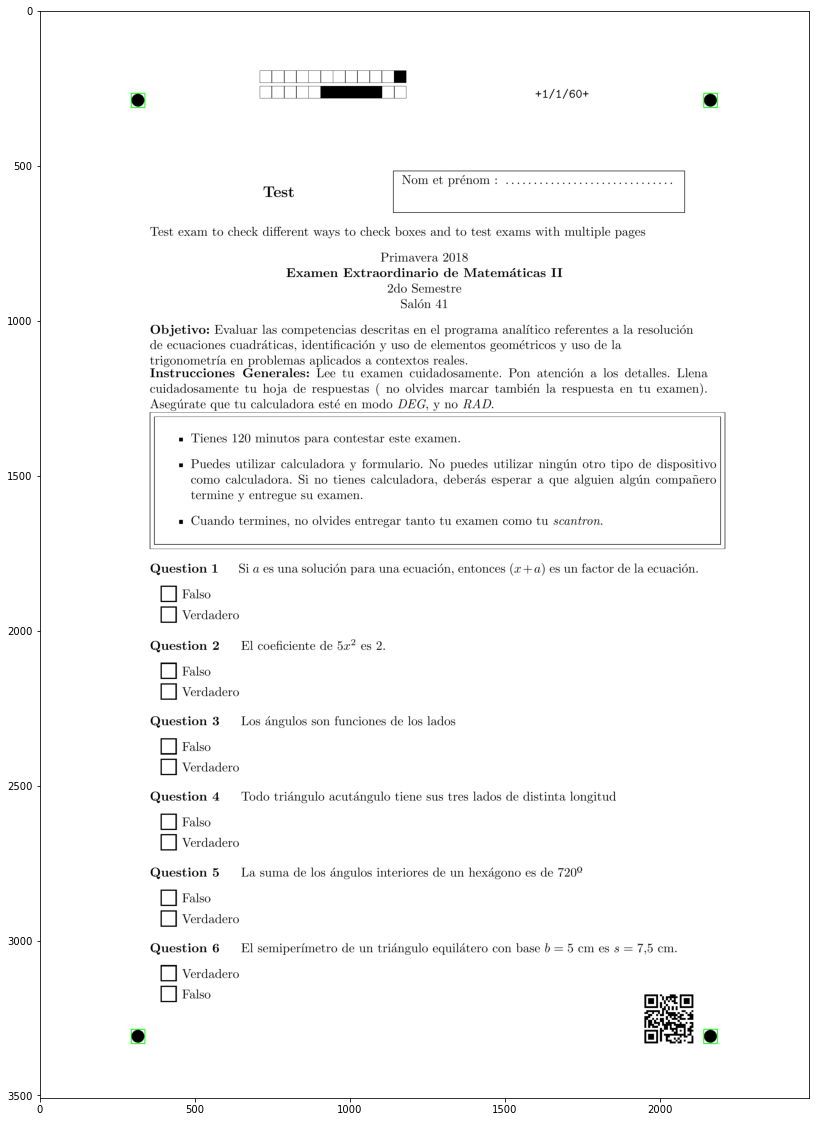

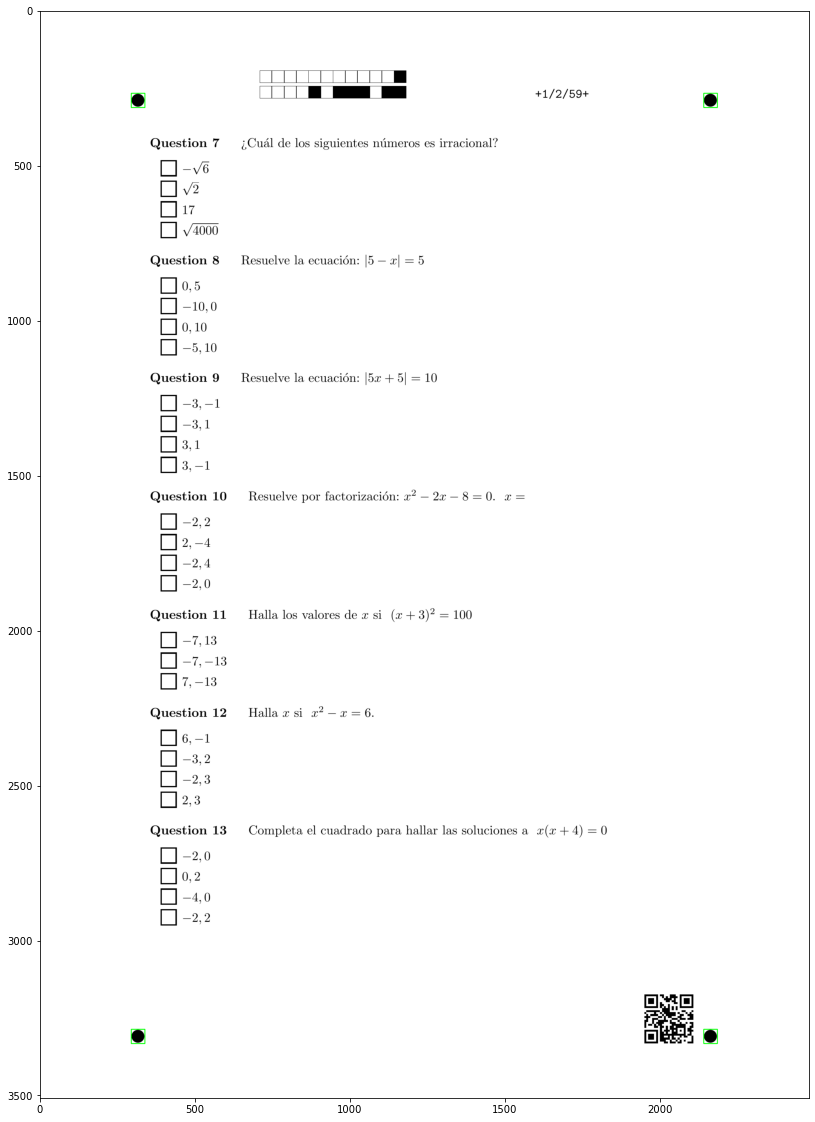

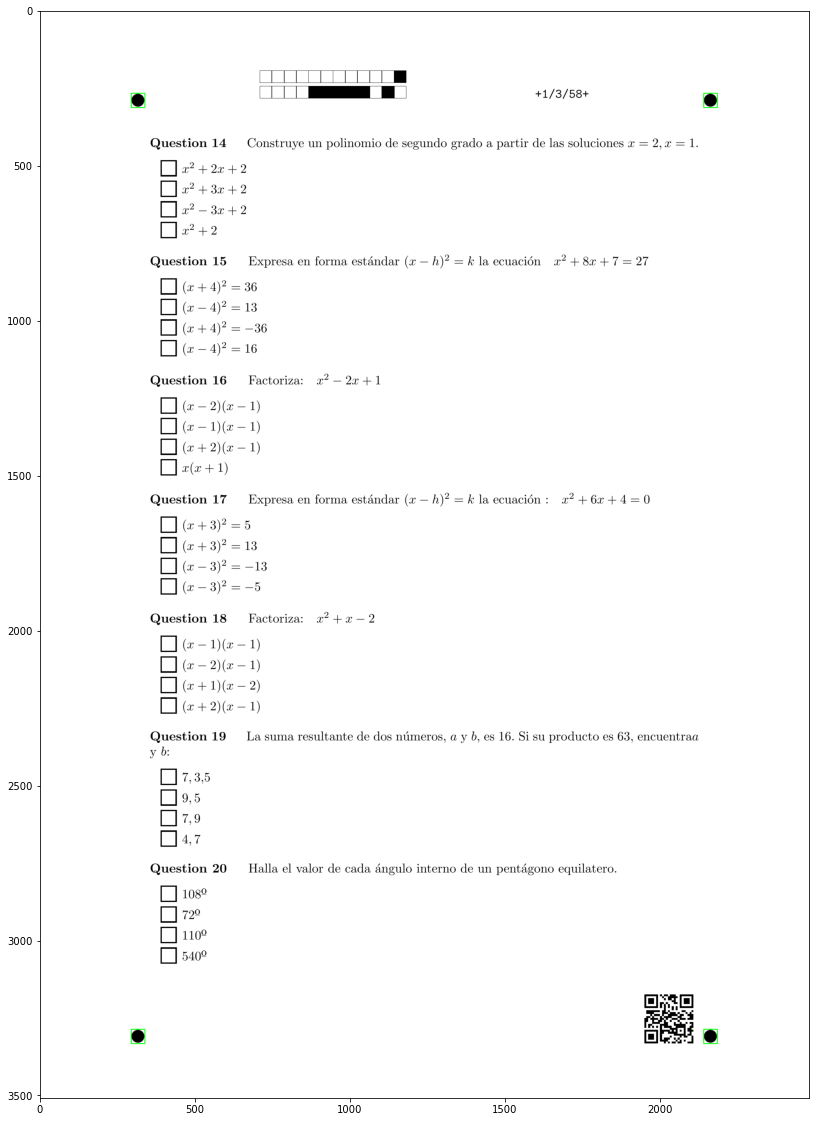

In [9]:
default_amc_circles = find_amc_circles(ex_file1, 300)

In [10]:
default_amc_circles

[(2141, 3286, 44, 46, 2163.0, 3309.0),
 (294, 3286, 44, 46, 316.0, 3309.0),
 (2141, 268, 44, 46, 2163.0, 291.0),
 (294, 268, 44, 46, 316.0, 291.0),
 (2141, 3286, 44, 46, 2163.0, 3309.0),
 (294, 3286, 44, 46, 316.0, 3309.0),
 (2141, 268, 44, 46, 2163.0, 291.0),
 (294, 268, 44, 46, 316.0, 291.0),
 (2141, 3286, 44, 46, 2163.0, 3309.0),
 (294, 3286, 44, 46, 316.0, 3309.0),
 (2141, 268, 44, 46, 2163.0, 291.0),
 (294, 268, 44, 46, 316.0, 291.0)]

In [11]:
np.array(default_amc_circles)/300

array([[ 7.13666667, 10.95333333,  0.14666667,  0.15333333,  7.21      ,
        11.03      ],
       [ 0.98      , 10.95333333,  0.14666667,  0.15333333,  1.05333333,
        11.03      ],
       [ 7.13666667,  0.89333333,  0.14666667,  0.15333333,  7.21      ,
         0.97      ],
       [ 0.98      ,  0.89333333,  0.14666667,  0.15333333,  1.05333333,
         0.97      ],
       [ 7.13666667, 10.95333333,  0.14666667,  0.15333333,  7.21      ,
        11.03      ],
       [ 0.98      , 10.95333333,  0.14666667,  0.15333333,  1.05333333,
        11.03      ],
       [ 7.13666667,  0.89333333,  0.14666667,  0.15333333,  7.21      ,
         0.97      ],
       [ 0.98      ,  0.89333333,  0.14666667,  0.15333333,  1.05333333,
         0.97      ],
       [ 7.13666667, 10.95333333,  0.14666667,  0.15333333,  7.21      ,
        11.03      ],
       [ 0.98      , 10.95333333,  0.14666667,  0.15333333,  1.05333333,
        11.03      ],
       [ 7.13666667,  0.89333333,  0.14666667,  0.